## House Prediction

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Viewing Data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory Data Analysis

### Removing Unnecessary Column

In [7]:
train.drop('Id',axis=1 , inplace=True)
get_id_test = test['Id']
test.drop('Id' ,axis=1, inplace=True)

## Corelation 

In [8]:
a=train.corr()

In [9]:
a['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

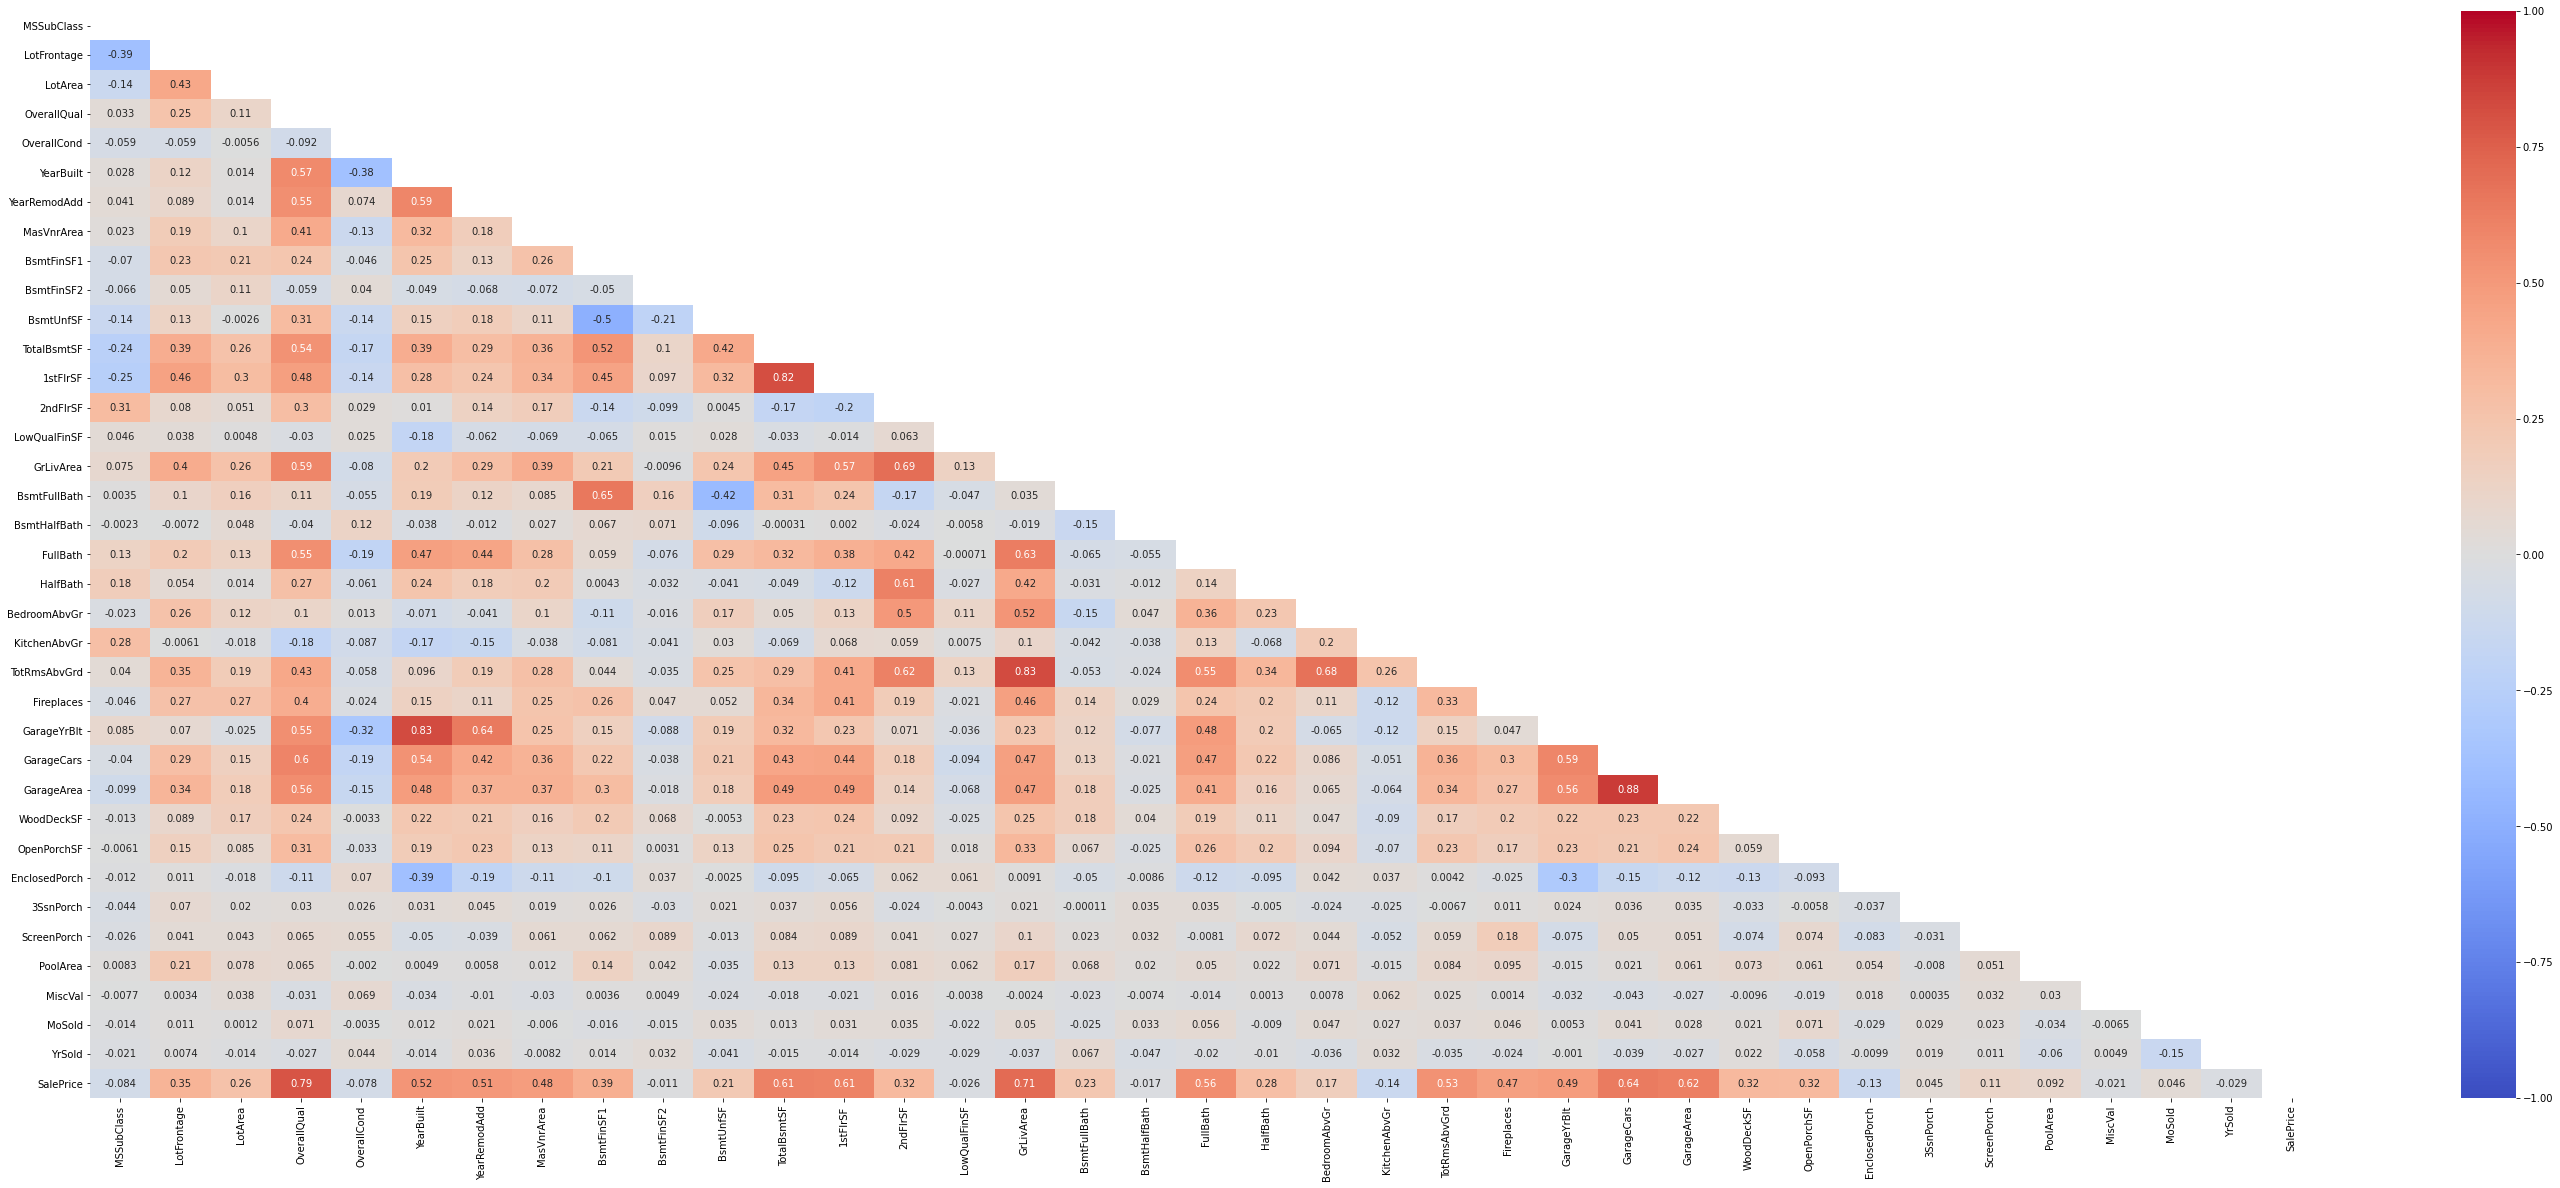

In [10]:
plt.figure(figsize=(50,20))
mask = np.zeros(a.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap( a ,vmin=-1,vmax=1 ,center=0,cmap='coolwarm',annot=True , mask=mask )

* Features corealted with Salesprice are OverallQual (0.79) , TotalBsmtSf(0.61) , 1stFlrSF(0.61) , GrLivArea(0.71) , GarageCars(0.64 , GarageArea(0.62)



* Features not correlated with SalePrice are MSSubClass(-0.084), OverallCond(-0.078), BsmtFinSF1(-0.011), LowQualFinSF(-0.026), BsmtHalfBath(-0.017), KitchenAbvGrd(-0.14), EnclosedPorch(-0.13), MiscVal(-0.021), YrSold(-0.029) *

# Data Visualization

## OverallQual vs SalesPrice


* Corealtion between Them is 0.79


* Making box and volin plot to analysis this data

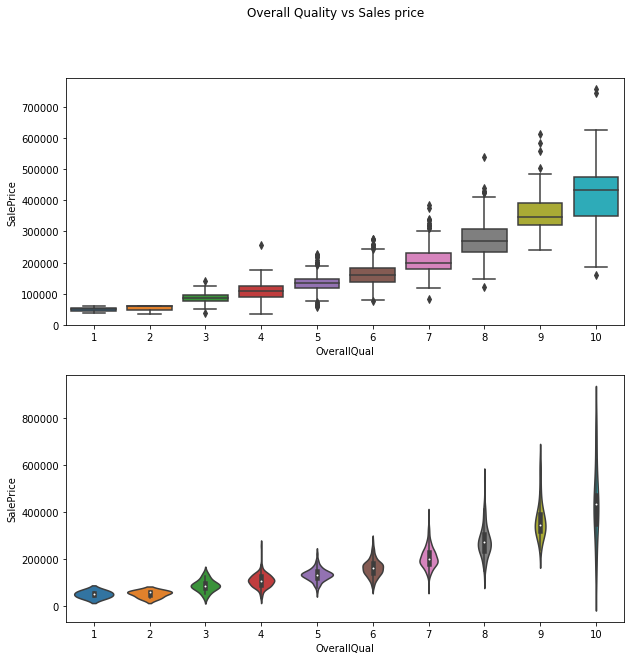

In [11]:
figure , ax =plt.subplots(2,1 ,figsize=(10,10))
plt.suptitle('Overall Quality vs Sales price')
sns.boxplot(ax=ax[0] , x='OverallQual' , y='SalePrice' , data=train)
sns.violinplot(ax=ax[1] , x='OverallQual' , y='SalePrice' , data=train) 
plt.show()

## TotalbsmtSF , 1stFlrSf , GrLivArea , GarageArea vs Sale Price

* corealted with Salesprice are OverallQual (0.79) , TotalBsmtSf(0.61) , 1stFlrSF(0.61) , GrLivArea(0.71)  , GarageArea(0.62) 

* these are continous values.


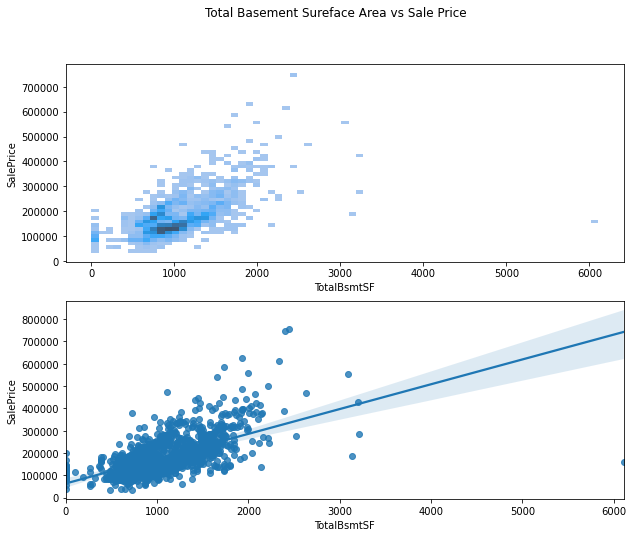

In [12]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Total Basement Sureface Area vs Sale Price')
sns.histplot(ax=ax[0], x='TotalBsmtSF' , y='SalePrice' , data=train)
sns.regplot(ax=ax[1] , x='TotalBsmtSF' , y='SalePrice' , data=train)
plt.show()

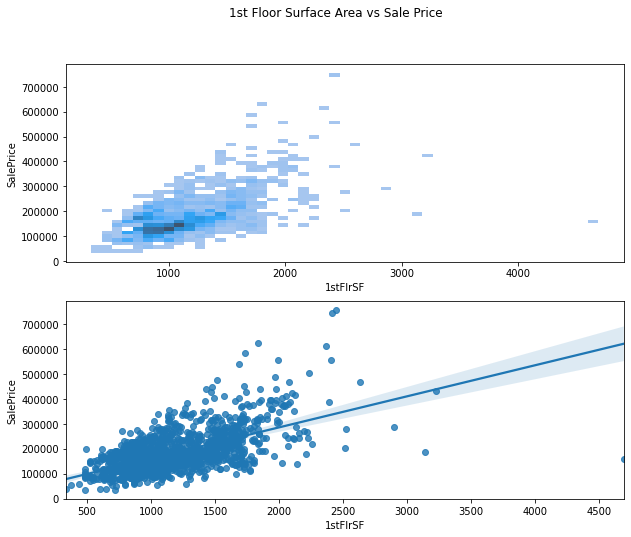

In [13]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('1st Floor Surface Area vs Sale Price')
sns.histplot(ax=ax[0], x='1stFlrSF' , y='SalePrice' , data=train)
sns.regplot(ax=ax[1] , x='1stFlrSF' , y='SalePrice' , data=train)
plt.show()

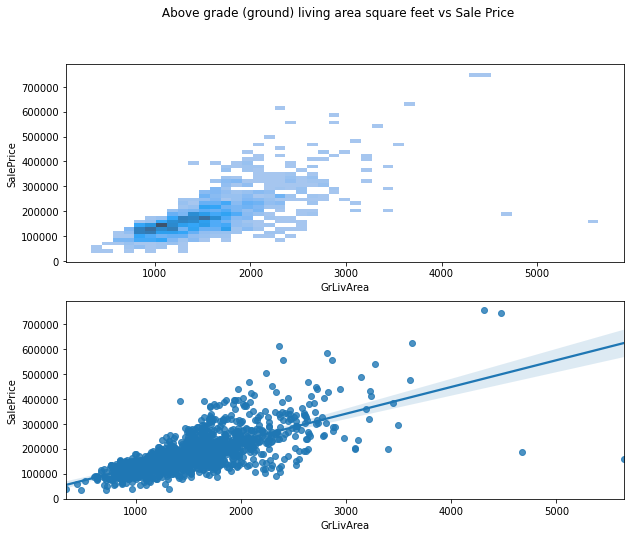

In [14]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle(' Above grade (ground) living area square feet vs Sale Price')
sns.histplot(ax=ax[0], x='GrLivArea' , y='SalePrice' , data=train)
sns.regplot(ax=ax[1] , x='GrLivArea' , y='SalePrice' , data=train)
plt.show()

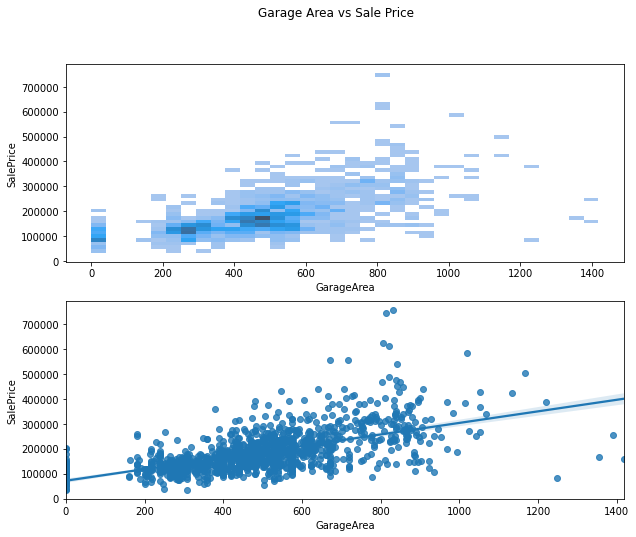

In [15]:
figure,ax =plt.subplots(2,1 , figsize=(10,8))
plt.suptitle('Garage Area vs Sale Price')
sns.histplot(ax=ax[0], x='GarageArea' , y='SalePrice' , data=train)
sns.regplot(ax=ax[1] , x='GarageArea' , y='SalePrice' , data=train)
plt.show()

## Year of building and re - building year of house vs Sale Price

* Corelation of YearBuilt with Sale Price is ( 0.52 ).

* Corelation of Remodel date  with Sale Price is ( 0.51 ).

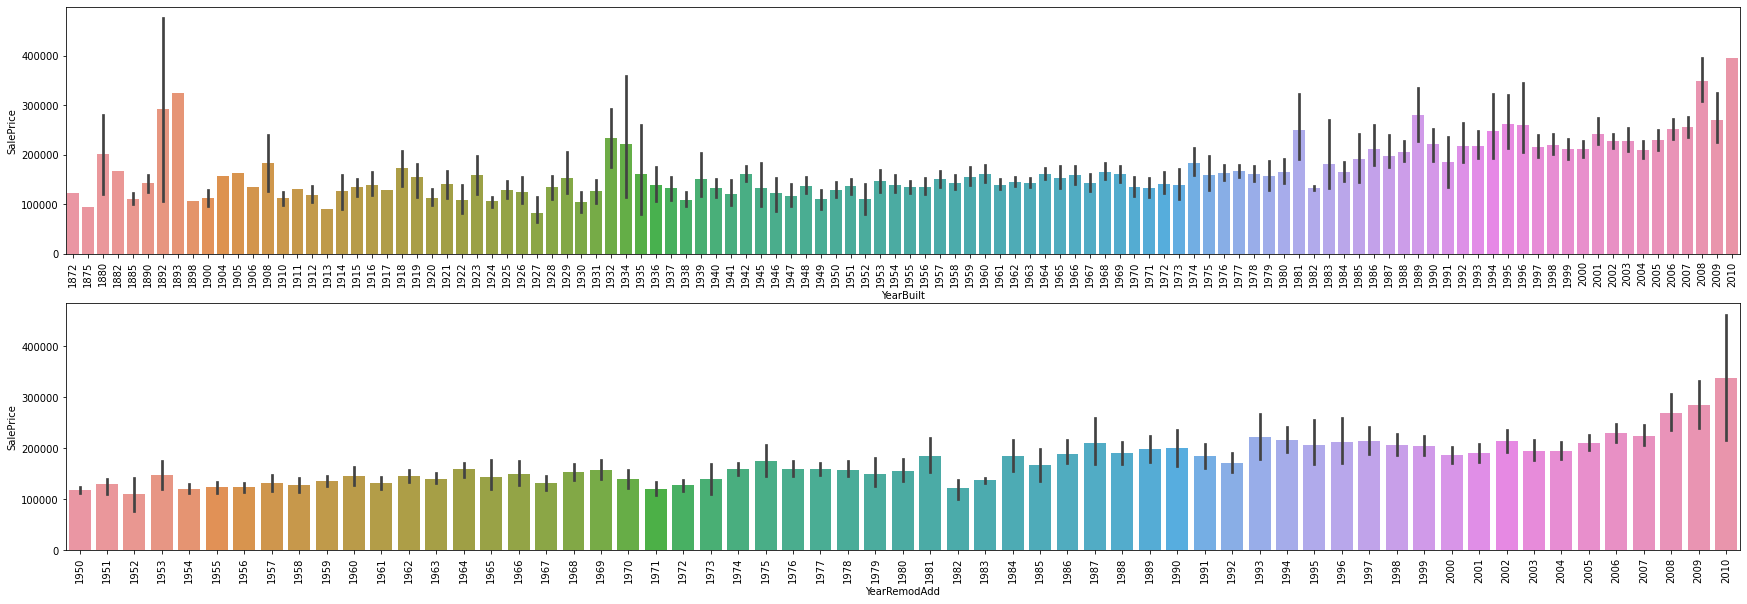

In [16]:
figure , ax =plt.subplots(2,1 , figsize=(30,10))
sns.barplot(ax=ax[0] , x='YearBuilt' , y='SalePrice' , data=train)
ax[0].set_xticklabels(ax[0].get_xticklabels() , rotation=90)

sns.barplot(ax=ax[1] , x='YearRemodAdd' , y='SalePrice' , data=train)
ax[1].set_xticklabels(ax[1].get_xticklabels() , rotation=90)
plt.show()

## Full Bath , Total Rms Ab , GarageCars  vs Sale Price

* Corelation of Fullbath with Sale Price is 0.56 .


* Corelation of TotalRmsAb  with Sale Price is 0.53.


* Corelation of GarageCars with Sale PRice is 0.64


* these are discrete value. thatswhy we use Bar graph

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

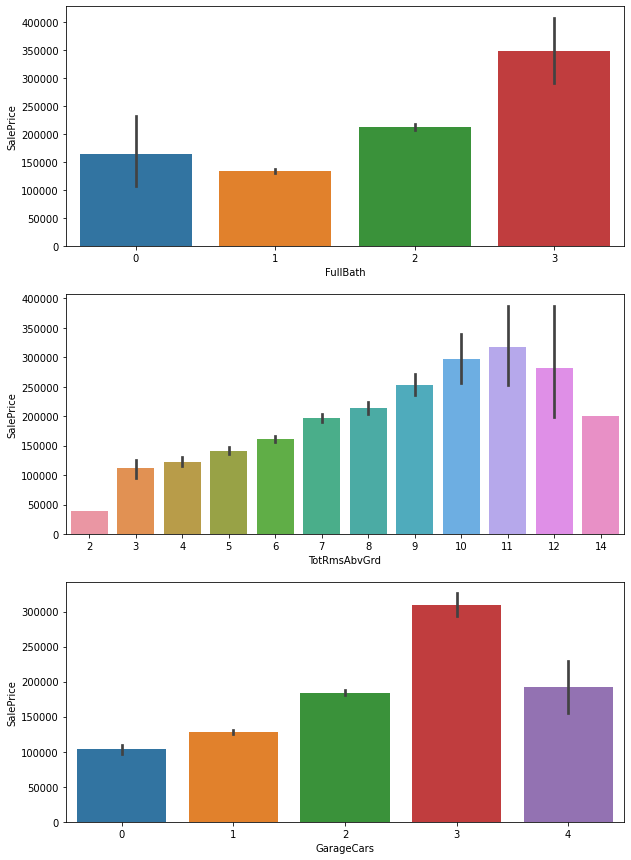

In [17]:
figure , ax =plt.subplots(3,1 , figsize=(10,15))
sns.barplot(ax=ax[0] , x='FullBath'  ,y='SalePrice' , data=train)
sns.barplot(ax=ax[1] , x='TotRmsAbvGrd'  ,y='SalePrice' , data=train)
sns.barplot(ax=ax[2] , x='GarageCars'  ,y='SalePrice' , data=train)

# Fixing Outlier

* We will use minimum and maximum threshold to remove the outliers from all the numeric features in training data

* We will delete every data less than min threshold and more than max threshold

In [18]:
## geeting all the numerical category 
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [19]:
## making a new df for outlier
train_outlier =train

In [20]:
## min_percentile==0.001
## max_percentile ==0.999
for feature in features :
    min_threshold , max_threshold =train[feature].quantile([0.001 , 0.999])
    train_outlier = train_outlier[(train_outlier[feature] > min_threshold) | (train_outlier[feature] < max_threshold)]

In [21]:
## we get the dataframe in which the outlier is fixed.
train_outlier.shape

(1195, 80)

# Data Preprocessing

In [22]:
Y_train = train_outlier['SalePrice']

## concating train and test together
all_data = pd.concat((train_outlier , test)).reset_index(drop = True)

all_data.drop('SalePrice' ,axis=1 , inplace=True)

all_data.shape

(2654, 79)

In [23]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Dropping Unnecesaary column

* Before fixing the null values. lets remove unuseful feature from data sets.

* Street contain most of same value . so lets drop this feature because it effect out modeling and prediction.

In [24]:
all_data['Street'].value_counts()

Pave    2643
Grvl      11
Name: Street, dtype: int64

In [25]:
all_data.drop('Street' , axis=1 , inplace=True)

* same thing also valid for Utilities feature .

In [26]:
all_data['Utilities'].value_counts()

AllPub    2652
Name: Utilities, dtype: int64

In [27]:
all_data.drop('Utilities' , axis=1 , inplace=True)

* PoolQC is dropped because all of its data is missing

In [28]:
all_data["PoolQC"].isnull().sum()

2645

In [29]:
all_data.drop('PoolQC' , axis=1 , inplace=True)

* LowQualFinSF is dropped because all of its value is same and it has negative corelation with Sale price

In [30]:
all_data.drop('LowQualFinSF' , axis=1 , inplace=True)

In [31]:
## getting shape of df
all_data.shape

(2654, 75)

## Fixing Missing Values

In [32]:
null = all_data.columns[all_data.isnull().any()]
all_data_na_count = all_data[null].isnull().sum()
all_data_na = (all_data[null].isnull().sum()/len(all_data)) * 100
all_data_null = pd.DataFrame({'Total Null Val': all_data_na_count, 'Null Value %': all_data_na})

In [33]:
all_data_null=all_data_null.sort_values(by='Null Value %',ascending=False)

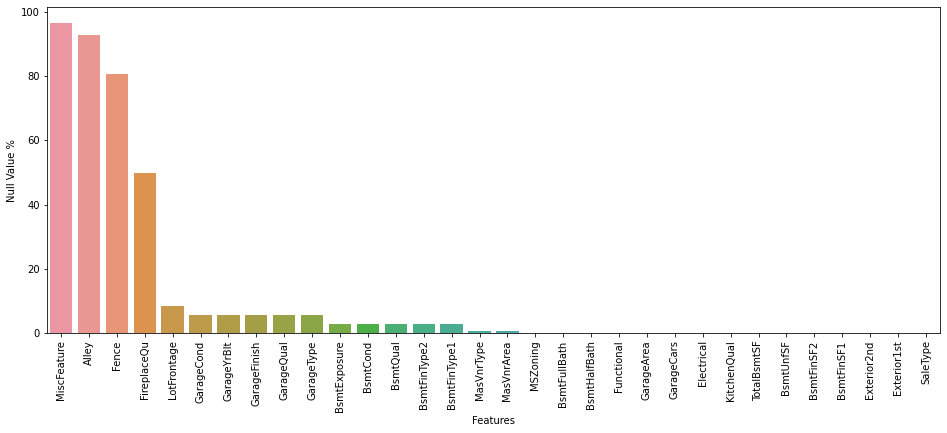

In [34]:
# visual of null value 
plt.figure(figsize=(16,6))
sns.barplot(x=all_data_null.index,y='Null Value %',data=all_data_null)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

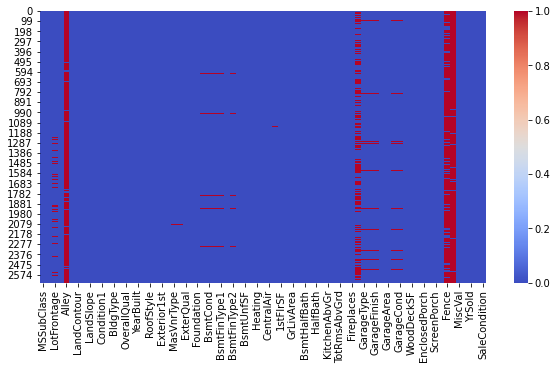

In [35]:
## Making Heatmap of null value
plt.figure(figsize=(10,5))
sns.heatmap(all_data.isnull() , cmap='coolwarm')
plt.show()

#### Replacing Null values of Categorical Data with None

In [36]:
feature =['MiscFeature', 'Alley','FireplaceQu', 'GarageFinish', 'GarageQual', 'Fence', 'GarageType', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for value in feature:
    all_data[value].fillna('None' , inplace=True)

#### Replacing Null Value with Median
* LotFrontage contains continuous data we are taking 'median' value


In [37]:
median_lot=all_data['LotFrontage'].median()
all_data['LotFrontage'].fillna(median_lot , inplace =True)

#### Replacing Categorical value with its mode

In [38]:
feature=['MSZoning','Electrical', 'Functional' , 'KitchenQual','Exterior1st','Exterior2nd', 'SaleType']
for value in feature : 
    all_data[value] .fillna(all_data[value].mode()[0] ,inplace=True)

##### Replacing Value with 0

In [39]:
feature=['GarageYrBlt', 'GarageArea', 'GarageCars' , 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for value in feature:
    all_data[value].fillna(0 , inplace=True)

### Re checking For Null Value

In [40]:
print(f'Shape of Data {all_data.shape}')
print(f'total Number of Null Values {all_data.isnull().sum().sum()}')

Shape of Data (2654, 75)
total Number of Null Values 0


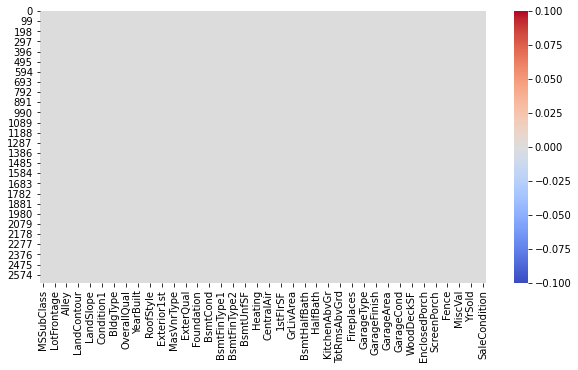

In [41]:
## MAking heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(all_data.isnull() , cmap='coolwarm')
plt.show()

## Feature Engineering

* we will create a new column named "TotalSF" by adding TotalBsmtSf + 1stFlrSF + 2ndFlrSF

* Similarly , create a new column named "TotalPorchSF" by adding all porch area.

*  creating a new column named 'TotalBathroom' by adding all the bathroom of the house.

In [42]:
## making new column
all_data['TotalSF'] = all_data['TotalBsmtSF'] +all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['TotalPorchSF'] =all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] +all_data['ScreenPorch']

all_data['Total_no_Bathroom'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath']

In [43]:
all_data.shape

(2654, 78)

* making new column by availability of Swimming pool , fireplace and 2nd floor.

In [44]:
## function 1
def pool (x):
    if x > 1 :
        return 1
    else :
        return 0

## function 2
def fireplace(x):
    if x>1 :
        return 1
    else:
        return 0

## function 3
def Secondfloor(x):
    if x>1:
        return 1
    else :
        return 0

In [45]:
all_data['has_pool'] = all_data['PoolArea'].apply(lambda x: pool(x))
all_data['has_fireplace'] = all_data['Fireplaces'].apply(lambda x: fireplace(x))
all_data['has_2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: Secondfloor(x))

In [46]:
all_data.shape

(2654, 81)

## Data Preprocessing

#### Do Categorical Transform on Data

In [47]:
## all categorical features
features = ['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence','MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir', 'MiscFeature',  'SaleType', 'SaleCondition',  'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Heating', 'Foundation']

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [49]:
for feature in features :
    all_data[feature] = label.fit_transform(all_data[feature])

In [50]:
## MAnually Encoding for Electical Feature
def m_encode(x) :
    if x=='SBrkr':
        return 0
    elif x=='FuseA' :
        return 1
    elif x=='FuseF':
        return 2
    elif x =='FuseP':
        return 3
    elif x=='Mix':
        return 4

In [51]:
all_data['Electrical'] = all_data['Electrical'].apply(lambda x : m_encode(x))

#### Spliting the data into train_set (X_train) and test_set(Y_test)

In [52]:
X_train = all_data[:len(train_outlier)]

Y_test = all_data[len(train_outlier):]

In [53]:
print(f'The shape of train set is -->{X_train.shape} , and the shape of test set is {Y_train.shape }')

The shape of train set is -->(1195, 81) , and the shape of test set is (1195,)


#### Scaling the Data

In [54]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
all_data_scaled = scalar.fit_transform(all_data)
all_data_scaled

array([[ 0.06261336, -0.04878806, -0.18741425, ..., -0.06739446,
        -0.28004179,  1.15241927],
       [-0.86964949, -0.04878806,  0.48456281, ..., -0.06739446,
        -0.28004179, -0.86773974],
       [ 0.06261336, -0.04878806, -0.05301884, ..., -0.06739446,
        -0.28004179,  1.15241927],
       ...,
       [-0.86964949, -0.04878806,  4.06844045, ..., -0.06739446,
        -0.28004179, -0.86773974],
       [ 0.64527764, -0.04878806, -0.32180966, ..., -0.06739446,
        -0.28004179, -0.86773974],
       [ 0.06261336, -0.04878806,  0.21577199, ..., -0.06739446,
        -0.28004179,  1.15241927]])

## Making Model

In [56]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit (X_train , Y_train)
predict = model.predict(Y_test)

#### Geting Prediction in Data Frame

In [57]:
# converting array values in dataframe
predicted= pd.DataFrame(predict, columns = ['SalePrice'])
# adding id
predicted.insert(0, "Id", get_id_test)

In [58]:
predicted.head(5)

,Id,SalePrice
0,1461,113949.903882
1,1462,174109.852356
2,1463,163945.409110
3,1464,178886.438034
4,1465,196521.421777


In [59]:
## MAking a csv file 
predicted.to_csv('sale_price_prediction.csv',index=False)